# BlackHoles@Home Tutorial: Generating Synthetic Data

## Author: Tyndale Stutzman, Joey Perko

## This tutorial explains how to generate synthetic binary blackhole data using the error function

## Introduction: 

As the [BlackHoles@Home](http://blackholesathome.net/) project develops there will be a growing archive of black hole merger data available for observation and experimentation. One of the appealing aspects of this new data is the opportunity for physically accurate visual simulations of black hole collisions. The purpose of this notebook is to provide an outline of how to generate synthetic data, validate it, and ultimately create a mock simulation via the visualization software [VisIt](https://visit-dav.github.io/visit-website/index.html).

Subsequent tutorial notebooks will demonstrate how to utilize the process of simulating the synthetic data in VisIt, seen at the end of this notebook, in order to quickly simulate real data using VisIt's python workflow feature. 

## Further Reading:

<a id='toc'></a>
# Table of Contents:
$$\label{toc}$$
<!--these buttons aren't functioning properly so maybe figure that out-->
1. [Step 1](#installing_modules): Installing necessary Python modules
1. [Step 2](#generation_script): Generating synthetic data with Python
1. [Step 3](#matplotlib_validation): Validating data via Matplotlib
1. [Step 4](#conclusion): Conclusion

# Step 1: Installing necessary Python modules \[Back to [top](#toc)\]
$$\label{installing_modules}$$
<a id='OS'></a>

<!--Add some fancy buttons etc. to skip to the apropriate section by OS respectively-->
Instructions are provided for your given operating system below. 

1. [GNU/OSX](#gnu_osx): <!--comments/suggestions re this OS-->
1. [Windows](#windows): <!--comments/suggestions re this OS-->

### GNU/OSX \[Back to [top](#OS)\] <!--maybe this is totally unecessary...?-->

In [ ]:
pip3 install scipy matplotlib math numpy

### Windows [Back to [top](#OS)\] <!--assuming pip3 install works on windows too, this entire cell can be deleted-->

In [ ]:
pip install scipy 
pip install matplotlib 
pip install math 
pip install numpy 

<a id='generation_script'></a>

# Step 2: Generating synthetic data with Python \[Back to [top](#toc)\]
$$\label{generation_script}$$

With all the dependencies installed and directories set, we can use a quick python script that takes the [error function](https://en.wikipedia.org/wiki/Error_function) and creates a text file with one-thousand data points, replicating the trajectories of two blackholes spiraling together sampled across one-thousand seconds.

<!-- in markdown this paragraph break will be more prominent than colab is displaying it-->
Before running the script, replace the 'destination_directory' variable with another destination path if desired.

In [ ]:
from scipy import special
import matplotlib as plt
from math import pi,cos,sin

#error function
def ERF(x,x0,w):
    return 0.5 * (scipy.special.erf(((x)-(x0))/(w)) + 1.0)

destination_directory = r"./"
t_final = 2000
num_data_pts = 1000
deltat = (t_final)/num_data_pts
BH1radius = 0.25
BH2radius = 0.25
orbital_period = 225
omega = 2*pi/orbital_period

#Replace 'synthetic_data.txt' here  
with open(destination_directory + "synthetic_data.txt", "w") as file:
    file.write("time BH1x BH1y BH2x BH2y\n")
    for i in range(num_data_pts):
        time = deltat * i 
        orbital_separation = ERF(time, 1000, -500) 
        #BH1 coords
        BH1x = 0.5 * orbital_separation * cos(omega * time)
        BH1y = 0.5 * orbital_separation * sin(omega * time)
        BH1z = 0
        #BH2 coords
        BH2x = -0.5 * orbital_separation * cos(omega * time)
        BH2y = -0.5 * orbital_separation * sin(omega * time)
        BH2z = 0
        
        #typecast
        outstr = str(time) + " " + str(BH1x) + " " + str(BH1y) + " " + str(BH2x) + " " + str(BH2y) + "\n"
        file.write(outstr)


: 

# Step 3: Validating Data with Matplotlib

With our synthetic data now in a text file, we can use Matplotlib to generate a graph of the hypothetical blackholes' trajectories.

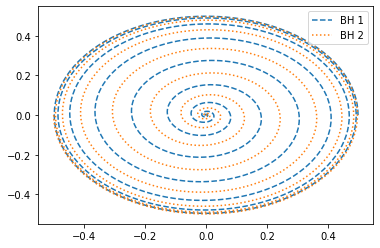

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#replace 'synthetic_data.txt' with the determined path above
data = np.genfromtxt('synthetic_data.txt', dtype=float, delimiter=' ', skip_header=1)
BHx1=data[:,1]
BHy1=data[:,2]
BHx2=data[:,3]
BHy2=data[:,4]

#notably, in future cases, the above text file will contain the z and r 
#variables of each blackhole. In this instance they were omitted because
#they remain constant over the entire interval.

x_upper = max([BHx1[0],BHx2[0]])
x_lower = min([BHx1[0],BHx2[0]])
y_upper = max([BHy1[0],BHy2[0]])
y_lower = min([BHy1[0],BHy2[0]])

plt.plot(BHx1,BHy1,label = "BH 1",linestyle = "--")
plt.plot(BHx2,BHy2,label = "BH 2",linestyle = "dotted")
plt.legend()
plt.show()

### Figure 1: BH1, BH2 x and y trajectory
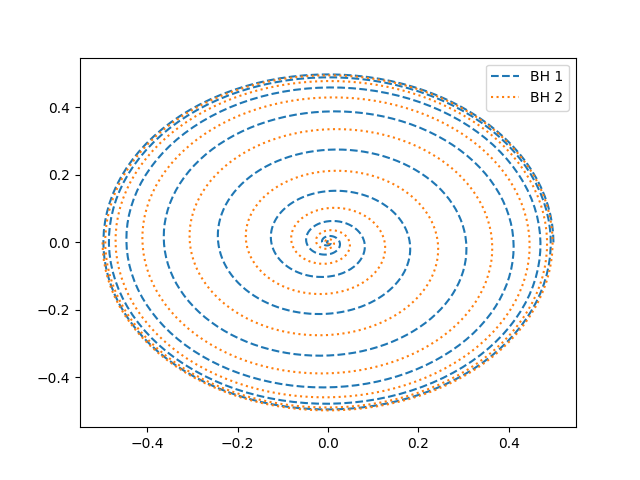

Assuming everything has executed properly, maplotlib should have generated a graph akin to this.

<a id='toc'></a>

# Step 4: Conclusion \[Back to [top](#toc)\]
$$\label{conclusion}$$

brief overview of what just happened and a quick explanation of how this notebook naturally leads to the next.